## Pasos previos

- Importar las librerías necesarias
- Sr carga en una variable llamada `raw_data` el contenido del fichero `my_players_info.csv`
- Se usa una ruta relativa en la llamada al fichero `my_players_info.csv`. 

In [1]:
# Se importan las librerias que se van a utilizar
import re
import pandas as pd
import numpy as np

In [2]:
# Crea una variable llamada raw_data de tipo DataFrame que tenga la información del fichero my_players_info.csv
path = './data/my_players_info.csv'
raw_data = pd.read_csv(path, sep=";")
df = raw_data.copy()

In [3]:
#Este método permite, en una sola linea, ver una descripción estadística del DataFrame.
df.describe()

,(goles),Altura,Apodo(s),Club,Debut,Debut deportivo,Deporte,Dorsal(es),Entrenador,Goles en clubes,...,Nombre de nacimiento,Pareja,Part.,Part. (goles),País,Peso,Posición,Retirada deportiva,Selección,nombre
count,1,467,156,472,147,470,478,309,10,214,...,29,11,32,204,178,273,477,3,248,478
unique,1,154,153,202,119,450,3,36,10,137,...,29,11,20,121,39,85,74,3,91,474
top,(97),"1,80 m (5 ft 11 in)","Pape, Diop, El Pulmón",Real Madrid C. F.,29 de mayo de 2016,2009(F. C. Barcelona B),Fútbol,7,Manolo Jiménez,11,...,Cristiano Ronaldo dos Santos Aveiro,Maitane Garralda,1,1 (0),España,75 kg (165 lb),Centrocampista,(Real Sociedad),ESP España,Sergi Samper
freq,1,26,2,21,7,2,476,20,1,8,...,1,1,5,29,75,16,93,1,39,2


In [4]:
def extraer_altura(df):
#Esta función va a consistir en transformar la columna 'Altura' a formato float64
 #- La función se llama **extraer_altura**
 #- La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 #- El DataFrame de entrada contiene una columna llamada 'Altura' que es de tipo object
 #- El DataFrame de salida contiene una columna llamada 'Altura' de tipo float64
 #- La columna 'Altura' de tipo float64 mantiene los valores nulos que mantenía en el momento de entrar en la función. 

    df['Altura'].fillna("-1", inplace=True)
    df['Altura'] = df['Altura'].map(str)
    df['Altura'] = df['Altura'].apply(lambda x: str(x).replace(",", ".").replace("'", "."))
    df['Altura'] = df['Altura'].apply(lambda x: x[0:4])
    df['Altura'] = df['Altura'].apply(lambda x: float(x))
    df.loc[df['Altura'] == -1, 'Altura'] = np.nan
    assert (isinstance(df, pd.DataFrame))
    return df



In [5]:
def extraer_peso(df):
#Esta función va a consistir en transformar la columna 'Peso' a formato float64
 #- La función se llama **extraer_peso**
 #- La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 #- El DataFrame de entrada contiene una columna llamada 'Peso' que es de tipo object
 #- El DataFrame de salida contiene una columna llamada 'Peso' de tipo float64
 #- La columna 'Peso' de tipo float64 debe mantener los valores nulos que mantenía en el momento de entrar en la función

    df['Peso'].fillna("-1", inplace=True)
    df['Peso'] = df['Peso'].map(str)
    df['Peso'] = df['Peso'].apply(lambda x: str(x).replace(",", ".").replace("'", "."))
    df['Peso'] = df['Peso'].apply(lambda x: x[0:3])
    df['Peso'] = df['Peso'].apply(lambda x: float(x))
    df.loc[df['Peso'] == -1, 'Peso'] = np.nan
    assert (isinstance(df, pd.DataFrame))
    return df

In [6]:
raw_data = pd.read_csv(path, sep=";")
df_4 = extraer_altura(raw_data)  
df_4 = extraer_peso(df_4) 


def clasificacion_oms(df):
 #- La función recibe como parámetro un DataFrame y debe devolver un DataFrame
 #- El DataFrame de entrada contiene, entre otras, dos columnas llamadas 'Peso' y 'Altura' que son de tipo float64 
 #- El DataFrame de salida contiene las mismas columnas que el DataFrame de entrada y además añade dos columnas nuevas: 'IMC' y #'clasificacoin_oms':
     #- La columna 'IMC' ,de tipo float64, que tiene el cálculo del Indice de Masa Corportal
     #- La columna 'clasificacion_oms', de tipo str o factor, que tiene los siguientes valores:
         #- "delgadez" cuando IMC < 18.5
         #- "normal" cuadno IMC >=18.50 y IMC < 25.0
         #- "sobrepeso" cuando IMC >=25 y IMC < 30
         #- "obeso" cuadno IMC >= 30 
     #- La columna 'clasificacoin_oms' solo puede tener como valor "delgadez", "normal", "sobrepeso", "obeso" y nulo. 

    df_4['IMC'] = df_4['Peso'] / (df_4['Altura'] * df_4['Altura'])
    limites = [min(df_4['IMC']), 18.5, 25, 30, max(df_4['IMC'])]
    categorias = ['delgadez', 'normal', 'sobrepeso', 'obeso']
    df_4['clasificacion_oms'] = pd.cut(df_4['IMC'], bins=limites, labels=categorias, include_lowest=True)

    assert (isinstance(df, pd.DataFrame))
    return df


In [7]:
raw_data[['Debut','Debut deportivo']].tail(3)

,Debut,Debut deportivo
475,29 de mayo de 2016,2013(Racing C.)
476,16 de junio de 2015,2009(Bayern de Múnich II)
477,31 de marzo de 2015,1 de agosto de 2013(Bursaspor)


In [8]:

def extraer_datos_debut(df):
    #Esta función va a consistir en extraer y unificar la información del debut del jugador. 
    def find_year(x):
        x=str(x)
        año = re.search('\d{4}', x)
        return int(año.group(0)) if año else 0
    def find_club(x):
        x=str(x)
        club = re.search('\((.*?)\)', x)
        return str(club.group(1)) if club else 0
    df['fecha_debut'] = df['Debut deportivo'].map(find_year)
    df['fecha_debut2'] = df['Debut'].map(find_year)
    df['club_debut'] = df['Debut deportivo'].map(find_club)
    df.loc[df['fecha_debut'] == 0, 'fecha_debut'] = df['fecha_debut2']
    df.loc[df['fecha_debut'] == 0, 'fecha_debut'] = np.nan
    df.loc[df['club_debut'] == 0, 'club_debut'] = np.nan
    df.drop(columns='Debut', inplace=True)
    df.drop(columns='Debut deportivo', inplace=True)
    df.drop(columns='fecha_debut2', inplace=True)
    #re.search('\(([^)]+)', s).group(1)
    # No modifiques las siguientes lineas
    assert(isinstance(df, pd.DataFrame))
    return df  

In [9]:
 #- Usa la función `to_numeric` para extraer el valor numérico de la columna 'Goles en clubes' 
raw_data['Goles en clubes'] = pd.to_numeric(raw_data['Goles en clubes'],errors='coerce')

In [10]:
#Guarda en la variable `num_imc_calculados`el total de jugadores para los que se ha podido calcular el IMC
df_4=clasificacion_oms(df_4)
num_imc_calculados = df_4['IMC'].count()

In [11]:
# Porcentajes de IMC
df_4['clasificacion_oms'].value_counts() / num_imc_calculados

normal       0.933579
sobrepeso    0.051661
obeso        0.011070
delgadez     0.003690
Name: clasificacion_oms, dtype: float64

In [12]:
# Encontrar jugador mas delgado
jugador_mas_delgado = df_4.loc[df_4['IMC'].idxmin(),['Nombre completo','Posición','IMC','Club']]
jugador_mas_delgado

Nombre completo    Fábio Benito Silva Coentrão Fabela dos Santos
Posición                                       Lateral izquierdo
IMC                                                      11.8598
Club                                                     Rio Ave
Name: 170, dtype: object

In [13]:
# Encontrar jugador mas Obeso
jugador_mas_obeso = df_4.loc[df_4['IMC'].idxmax(),['Nombre completo','Posición','IMC','Club']]
jugador_mas_obeso

Nombre completo    Sergi Samper Montaña
Posición                 Centrocampista
IMC                             58.6777
Club                    F. C. Barcelona
Name: 200, dtype: object

In [14]:
# Guardar los jugadores que aún juegen en el equipo en el que debutaron
extraer_datos_debut(df_4)
df_debutantes = df_4.loc[df_4['Club'] == df_4['club_debut']]
df_debutantes.sample(3)

,(goles),Altura,Apodo(s),Club,Deporte,Dorsal(es),Entrenador,Goles en clubes,Liga,Nacimiento,...,País,Peso,Posición,Retirada deportiva,Selección,nombre,IMC,clasificacion_oms,fecha_debut,club_debut
395,NaN,1.71,Juanpi,Málaga C. F.,Fútbol,11,NaN,5.0,Primera División de España,Caracas24 de enero de 1994 (24 años),...,Venezuela,NaN,Mediocampista,NaN,Venezuela Venezuela,Juanpi,NaN,NaN,2014.0,Málaga C. F.
29,NaN,1.80,NaN,Real Club Celta de Vigo,Fútbol,2,NaN,NaN,NaN,"Marín, Pontevedra22 de junio de 1991 (27 años)",...,España,NaN,Lateral derecho,NaN,NaN,Hugo Mallo,NaN,NaN,2009.0,Real Club Celta de Vigo
470,NaN,1.84,NaN,Villarreal Club de Fútbol,Fútbol,19,NaN,31.0,Primera División de España,"Artana, Castellón12 de junio de 1984 (34 años)",...,España España,73.0,Centrocampista,NaN,España España,Bruno Soriano,21.561909,normal,2006.0,Villarreal Club de Fútbol


In [15]:
# Realizar una visualizacion que permita ver la relacion entre IMC y la posición del jugador en el equipo
raw_data = pd.read_csv(path, sep=";")
df_4 = extraer_altura(raw_data) 
df_4 = extraer_peso(df_4)  
df_4 = clasificacion_oms(df_4)
df_4['Posición'] = df_4['Posición'].map(str)
df_4['Posición'] = df_4['Posición'].apply(lambda x: x[0:7])
df_4['Posición'] = df_4['Posición'].apply(lambda x: x.lower())
df_4['Posición'].unique()

array(['portero', 'lateral', 'defensa', 'medioce', 'interio', 'centroc',
       'mediapu', 'extremo', 'delante', 'guardam', 'central', 'defenso',
       'volante', 'centrod', 'arquero', 'medio c', 'pivote', 'medioca',
       'cariler', 'medio', 'nan'], dtype=object)

In [16]:
traductor_posicion = {'portero': 'Portero',
                      'guardam': 'Portero',
                      'arquero': 'Portero',
                      'lateral': 'Defensa',
                      'defensa': 'Defensa',
                      'central': 'Defensa',
                      'defenso': 'Defensa',
                      'cariler': 'Defensa',
                      'medioce': 'Mediocampista',
                      'interio': 'Mediocampista',
                      'centroc': 'Mediocampista',
                      'volante': 'Mediocampista',
                      'medio c': 'Mediocampista',
                      'pivote': 'Mediocampista',
                      'medioca': 'Mediocampista',
                      'medio': 'Mediocampista',
                      'mediapu': 'Delantero',
                      'extremo': 'Delantero',
                      'delante': 'Delantero',
                      'centrod': 'Delantero',
                      'nan': np.nan
                     }

In [17]:
df_4['Posicion_mapeada'] = df_4['Posición'].map(traductor_posicion)
df_4['Posicion_mapeada'].unique()

array(['Portero', 'Defensa', 'Mediocampista', 'Delantero', nan],
      dtype=object)

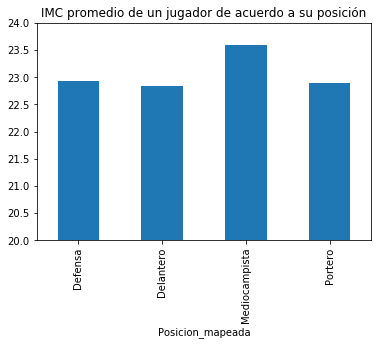

In [18]:
df_imc = df_4.groupby(['Posicion_mapeada'])['IMC'].mean()
ax3 = df_imc.plot.bar()
ax3.set_title('IMC promedio de un jugador de acuerdo a su posición')
ax3.set_ylim([20,24])
ax3.figure.savefig('relacion_imc_posicion.png',bbox_inches='tight')